In [103]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import glob
import os

# Combining multiple samples from the same experiments together

I should automate this, but it's not much work by hand

Just need to add the mouse,sample,replicate,sample_id columns and concat tables

In [29]:
#These are the columns that I need
pd.read_csv('../outputs/gene_cell/Viz_punctate.csv',nrows=10)

,metric,cell_id,ontology,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id
0,punctate,100017734550312084181135172254070344638,33,1014,Ackr1,3,504.0,0.006910,0.199999,1,3,2,S3R2
1,punctate,100017734550312084181135172254070344638,33,1014,Adcyap1r1,2,462.5,0.088845,0.166831,1,3,2,S3R2
2,punctate,100017734550312084181135172254070344638,33,1014,Adgra2,1,41.0,0.921027,0.333991,1,3,2,S3R2
3,punctate,100017734550312084181135172254070344638,33,1014,Adgrb1,18,236.5,0.535044,0.046665,1,3,2,S3R2
4,punctate,100017734550312084181135172254070344638,33,1014,Adgrb3,11,449.0,0.115499,0.076314,1,3,2,S3R2
5,punctate,100017734550312084181135172254070344638,33,1014,Adgrg1,1,5.0,0.992103,0.333991,1,3,2,S3R2
6,punctate,100017734550312084181135172254070344638,33,1014,Adgrl1,23,634.0,-0.249753,0.039209,1,3,2,S3R2
7,punctate,100017734550312084181135172254070344638,33,1014,Adgrl2,4,577.5,-0.138203,0.133201,1,3,2,S3R2
8,punctate,100017734550312084181135172254070344638,33,1014,Adgrl3,8,308.0,0.393880,0.088449,1,3,2,S3R2
9,punctate,100017734550312084181135172254070344638,33,1014,Adora1,8,610.5,-0.203356,0.088449,1,3,2,S3R2


In [16]:
#Here are the columns that I get directly from output
pd.read_csv('../mouse1sample1_central.csv',nrows=10)

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,median_rank,score,variance
0,central,100002246487729891775754092425114477436,unannotated,446,Prss23,24,164.0,0.267416,0.035172
1,central,100002246487729891775754092425114477436,unannotated,446,Ptprm,17,205.0,0.083146,0.050967
2,central,100002246487729891775754092425114477436,unannotated,446,Igfbp4,4,278.5,-0.247191,0.133030
3,central,100002246487729891775754092425114477436,unannotated,446,Acta2,3,304.0,-0.361798,0.199996
4,central,100002246487729891775754092425114477436,unannotated,446,Sgcd,1,156.0,0.303371,0.334831
5,central,100002246487729891775754092425114477436,unannotated,446,Lmo1,1,190.0,0.150562,0.334831
6,central,100002246487729891775754092425114477436,unannotated,446,Slc32a1,52,217.0,0.029213,0.016159
7,central,100002246487729891775754092425114477436,unannotated,446,Slc30a3,11,226.0,-0.011236,0.075532
8,central,100002246487729891775754092425114477436,unannotated,446,Cux2,6,256.0,-0.146067,0.106415
9,central,100002246487729891775754092425114477436,unannotated,446,Nxph1,4,312.0,-0.397753,0.133030


In [34]:
sample_paths = {
    'biccn_mop_paths':glob.glob('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse*central*'),
    'vz_brainmap_paths':glob.glob('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/Slice*central*'),
    'seqfish_paths':glob.glob('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/seqfish_plus_central.csv'),
    'czb_liver_paths':glob.glob('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/liver_gv_filt_central.csv'),
    'czb_kidney_paths':glob.glob('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/kidney_111921_gv_filt_central.csv'),
}
sample_paths['biccn_mop_paths']

['/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample6_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse1sample4_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample5_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample1_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse1sample1_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample3_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse1sample3_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse1sample5_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample4_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse1sample2_central.csv',
 '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/mouse2sample2_central.csv',
 '/oak/sta

In [24]:
#BICCN MOp data
out_path = '../outputs/gene_cell/MOp_central.csv'

for i,p in enumerate(sample_paths['biccn_mop_paths']):
    m,s = os.path.basename(p).split('_central.csv')[0].replace('mouse','').split('sample')
    
    df = pd.read_csv(p)
    df['mouse'] = int(m)
    df['sample'] = int(s)
    df['replicate'] = 1
    df['sample_id'] = 'm{}s{}'.format(m,s)
    
    df.to_csv(out_path, mode=('w' if i==0 else 'a'), header=i==0, index=False)
    

In [37]:
#Vizgen Brainmap data
out_path = '../outputs/gene_cell/Viz_central.csv'

for i,p in enumerate(sample_paths['vz_brainmap_paths']):
    s,r = os.path.basename(p).split('_')[:2]
    s,r = s[-1],r[-1]
    
    df = pd.read_csv(p)
    df['mouse'] = 1
    df['sample'] = s
    df['replicate'] = r
    df['sample_id'] = 'S{}R{}'.format(s,r)
    
    df.to_csv(out_path, mode=('w' if i==0 else 'a'), header=i==0, index=False)
    

In [32]:
#SeqFISH data
out_path = '../outputs/gene_cell/Seq_central.csv'

for i,p in enumerate(sample_paths['seqfish_paths']):
    s,r = os.path.basename(p).split('_')[:2]
    s,r = s[-1],r[-1]
    
    df = pd.read_csv(p)
    df['mouse'] = 1
    df['sample'] = 1
    df['replicate'] = 1
    df['sample_id'] = 'm1s2'
    
    df.to_csv(out_path, mode=('w' if i==0 else 'a'), header=i==0, index=False)
    

In [35]:
#CZB liver data
out_path = '../outputs/gene_cell/CZB_liver_central.csv'

for i,p in enumerate(sample_paths['czb_liver_paths']):
    s,r = os.path.basename(p).split('_')[:2]
    s,r = s[-1],r[-1]
    
    df = pd.read_csv(p)
    df['mouse'] = 1
    df['sample'] = 1
    df['replicate'] = 1
    df['sample_id'] = 'm1s2'
    
    df.to_csv(out_path, mode=('w' if i==0 else 'a'), header=i==0, index=False)
    

In [36]:
#CZB kidney data
out_path = '../outputs/gene_cell/CZB_kidney_central.csv'

for i,p in enumerate(sample_paths['czb_kidney_paths']):
    s,r = os.path.basename(p).split('_')[:2]
    s,r = s[-1],r[-1]
    
    df = pd.read_csv(p)
    df['mouse'] = 1
    df['sample'] = 1
    df['replicate'] = 1
    df['sample_id'] = 'm1s2'
    
    df.to_csv(out_path, mode=('w' if i==0 else 'a'), header=i==0, index=False)
    

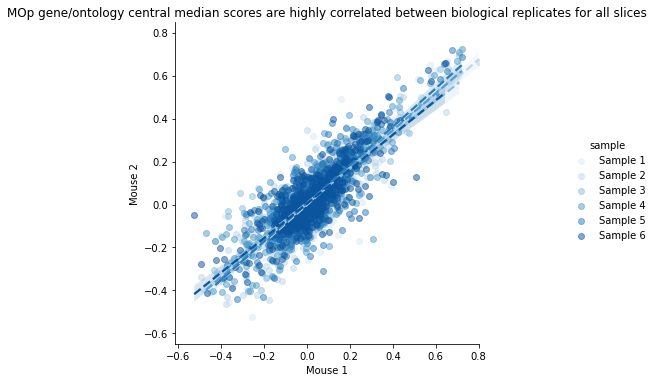

In [54]:
#Initial look at MOp central score correlations (looks good phew)
df = pd.read_csv('../outputs/gene_ontology/MOp_central_10X_ontology.csv')
df['mouse'] = 'Mouse '+df['sample_id'].str[1]
df['sample'] = 'Sample '+df['sample_id'].str[3]

plot_df = df.pivot(
    index=['gene','ontology','sample'],
    columns='mouse',
    values='med_score',
).reset_index()

fig = sns.lmplot(
    x = 'Mouse 1',
    y = 'Mouse 2',
    hue = 'sample',
    palette = 'Blues',
    scatter_kws = {'alpha':0.5},
    line_kws = {'linestyle':'dashed'},
    data = plot_df,
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('equal')
plt.title('MOp gene/ontology central median scores are highly correlated between biological replicates for all slices')
fig.savefig('mop_central_gene_ont_corr_across_mice.svg')
plt.show()
plt.close()

mouse,gene,ontology,sample,Mouse 1,Mouse 2
0,Acta2,L2/3 IT,Sample 1,-0.138889,-0.200191
23,Acta2,SMC,Sample 1,-0.058824,0.011111
50,Adamts2,VLMC,Sample 1,0.003417,0.107143
65,Adamts4,Oligo,Sample 1,0.102740,0.020747
71,Adra1b,L2/3 IT,Sample 1,-0.063525,-0.071672
...,...,...,...,...,...
6535,Wnt7b,L5 ET,Sample 1,-0.048117,-0.092118
6541,Wnt7b,L5 IT,Sample 1,-0.034566,-0.069801
6547,Wnt7b,L6 CT,Sample 1,-0.124555,-0.075497
6553,Wnt7b,L6 IT,Sample 1,-0.030116,-0.130868


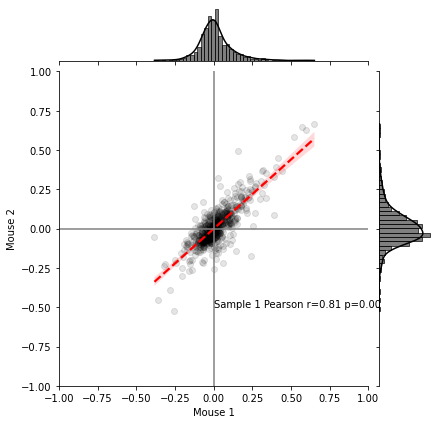

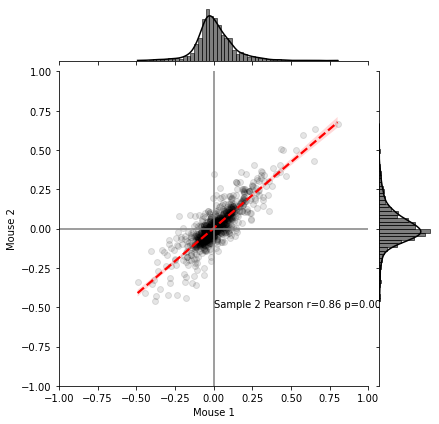

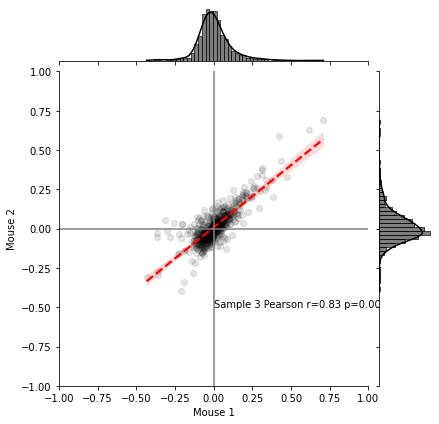

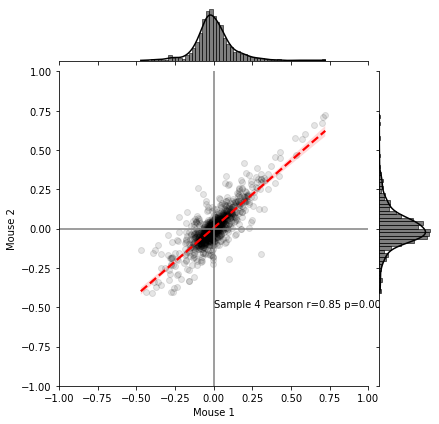

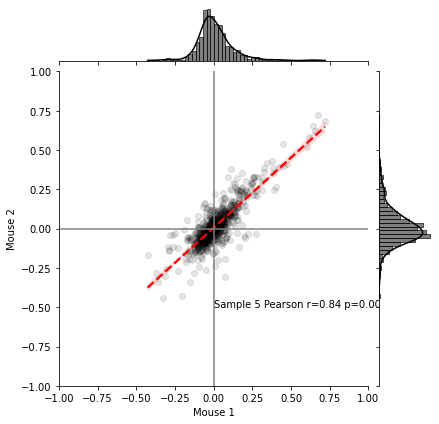

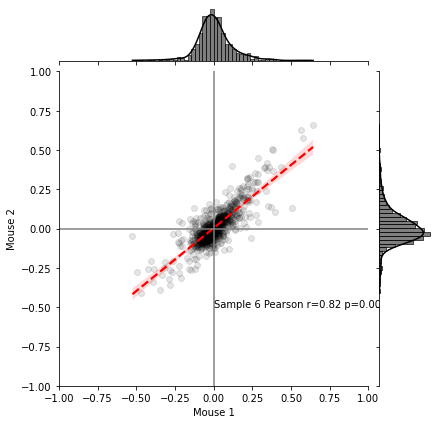

In [116]:
#Initial look at MOp central score correlations (looks good phew)
df = pd.read_csv('../outputs/gene_ontology/MOp_central_10X_ontology.csv')
df['mouse'] = 'Mouse '+df['sample_id'].str[1]
df['sample'] = 'Sample '+df['sample_id'].str[3]

plot_df = df.pivot(
    index=['gene','ontology','sample'],
    columns='mouse',
    values='med_score',
).reset_index()

for i,(sample,g) in enumerate(plot_df.groupby('sample')):
    g = g.dropna()

    fig = sns.jointplot(
        x = 'Mouse 1',
        y = 'Mouse 2',
        kind = 'reg',
        color = 'black',
        scatter_kws = {'alpha':0.1},
        line_kws = {'linestyle':'dashed','color':'red'},
        data = g,
    )
    r,p = stats.pearsonr(g['Mouse 1'], g['Mouse 2'])
    
    fig.ax_joint.set_xlim(-1,1)
    fig.ax_joint.set_ylim(-1,1)
    fig.ax_joint.axhline(0,color='grey')
    fig.ax_joint.axvline(0,color='grey')
    fig.ax_joint.text(0,-0.5,'{} Pearson r={:.2f} p={:.2f}'.format(sample,r,p))
    #plt.suptitle('Centrality score measured from cell centroid')
    plt.show()
    plt.close()

#plt.suptitle('MOp gene/ontology central median scores are highly correlated between biological replicates for all slices')
#fig.savefig('mop_central_gene_ont_corr_across_mice.svg')
plt.show()
plt.close()

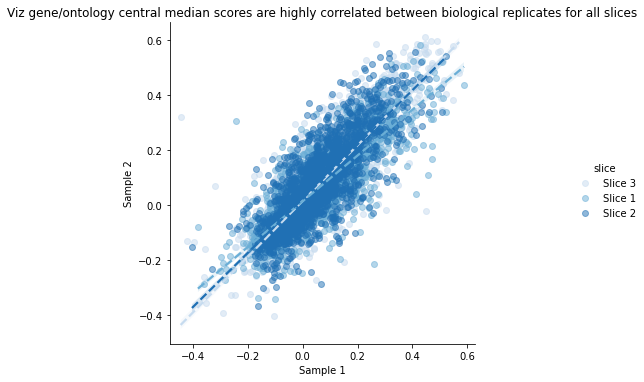

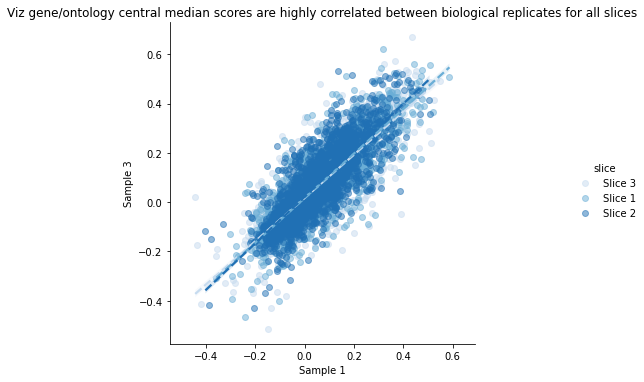

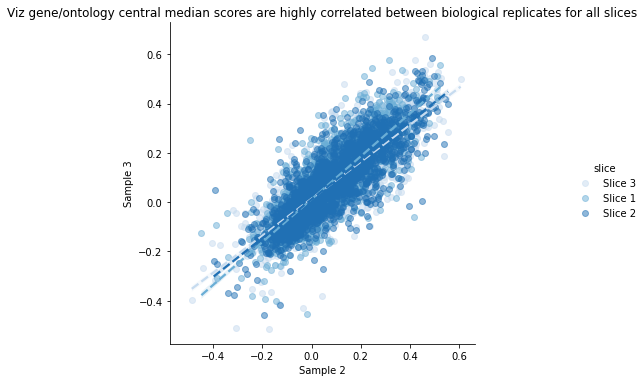

In [62]:
#Initial look at Vizgen Brainmap central score correlations (looks good!!)
df = pd.read_csv('../outputs/gene_ontology/Viz_central.csv')
df['sample'] = 'Sample '+df['sample_id'].str[1]
df['slice'] = 'Slice '+df['sample_id'].str[3]

for s1,s2, in itertools.combinations(df['sample'].unique(),2):
    plot_df = df.pivot(
        index=['gene','ontology','slice'],
        columns='sample',
        values='med_score',
    ).reset_index()

    fig = sns.lmplot(
        x = s1,
        y = s2,
        hue = 'slice',
        palette = 'Blues',
        scatter_kws = {'alpha':0.5},
        line_kws = {'linestyle':'dashed'},
        data = plot_df,
    )
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.axis('equal')
    plt.title('Viz gene/ontology central median scores are highly correlated between biological replicates for all slices')
    #fig.savefig('viz_central_gene_ont_corr_across_mice.svg')
    plt.show()
    plt.close()